In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as mp
from scipy import stats
from collections import OrderedDict
from numpy import random

In [6]:
def linspace(start, stop, N):
    if N == 1:
        yield stop
        return
    h = (stop - start) / (N - 1)
    for i in range(N):
        yield start + h * i
        
def abscissa(start, stop, N, datatype):
    if datatype == 0:
        return list(linspace(start, stop, N))
        
    elif datatype == 1:
        return np.linspace(start, stop, N)
        
    else:
        return 'Invalid datatype. Use 0 for lists and 1 for numpy arrays.'
    
    return None

def log(x):
    lst = []
    for i in x:
        lst.append(mp.log(i))
    
    return lst

def sin(x):
    lst = []
    for i in x:
        lst.append(mp.sin(i))
    
    return lst

def atan(x):
    lst = []
    for i in x:
        lst.append(mp.atan(i))
    
    return lst

def tan(x):
    lst = []
    for i in x:
        lst.append(mp.tan(i))
    
    return lst

def piecewise(x):
    return tan(x[:len(x)//2]) + sin(x[len(x)//2:])

def nplog(x):
    return np.log(x)

def npsin(x):
    return np.sin(x)

def npatan(x):
    return np.arctan(x)

def nppiecewise(x):
    return np.piecewise(x, [x < 0, x >= 0], [lambda x: np.tan(x), lambda x: np.sin(x)])

def nprandom(N):
    return random.random_sample(N)

def compare(start, stop, N, func, datatype):
    x = abscissa(start, stop, N, datatype)
    
    y = func(x)
    
    return None

def time3(start, stop, n, func, datatype):
    x = np.zeros(n)
    y = np.zeros(n)
    factor = 1e6 ## Converts units of seconds to units of microseconds
    
    for k in range(n):
        N = (2**8) * k
        time_it = %timeit -q -n 16 -o compare(start, stop, N, func, datatype)
        
        x[k] = N
        y[k] = time_it.best * factor
        
    print('Computed', k+1, 'loops', end='')
        
    return x, y

def time4(n,func):
    x = np.zeros(n)
    y = np.zeros(n)
    factor = 1e6 ## Converts units of seconds to units of microseconds
    
    for k in range(n):
        N = (2**8) * k
        time_it = %timeit -q -n 16 -o func(N)
        x[k] = N
        y[k] = time_it.best * factor
        
    print('Computed', k+1, 'loops', end='')
            
    return x, y

def plot(x,y,title):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    r_squared = r_value**2
    
    plt.title(title)
    plt.xlabel('N')
    plt.ylabel('Time ($\mu$s)')
    plot = plt.plot(x, y, 'o:', label='data')    
    plt.plot(x, x*slope + intercept, label='lin regress')
    
    plt.legend(loc='best')
    
    return plt.show(plot), print('r^2:', r_squared, '\nslope:', slope, '\n')

In [7]:
n = 16

title_args = OrderedDict([
    ("list log", [0.1, 100, n, log, 0]),
    ("np log", [0.1, 100, n, nplog, 1]),
    ("list sin", [0, 2*mp.pi, n, sin, 0]),
    ("np sin", [0, 2*np.pi, n, npsin, 1]),
    ("list atan", [-1, 1, n, atan, 0]),
    ("np atan", [-1, 1, n, npatan, 1]),
    ("list piecewise", [-1, 1, n, piecewise, 0]),
    ("np piecewise", [-1, 1, n, nppiecewise, 1]),
])

Computed 16 loops

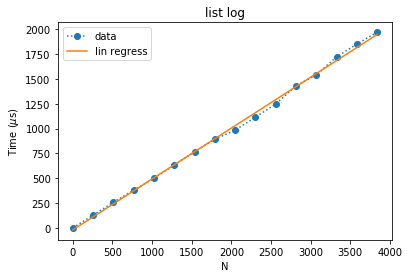

r^2: 0.9981917935179458 
slope: 0.5122010713465114 

Computed 16 loops

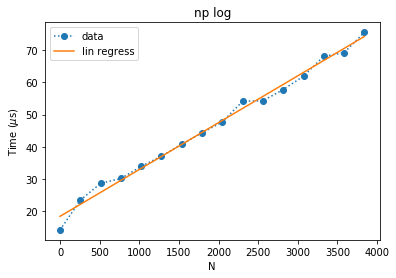

r^2: 0.9907284259768073 
slope: 0.014538215188399227 

Computed 16 loops

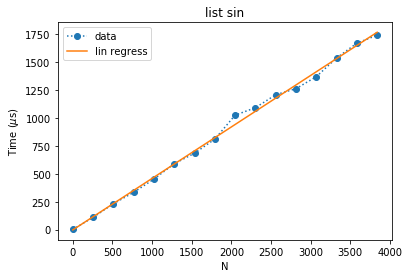

r^2: 0.9969790639149178 
slope: 0.4610725672104995 

Computed 16 loops

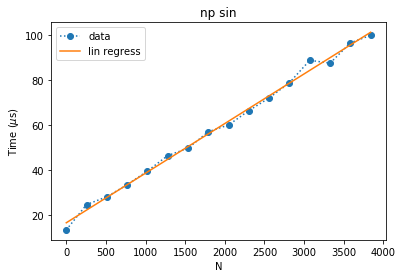

r^2: 0.9950579037458925 
slope: 0.022022884593258595 

Computed 16 loops

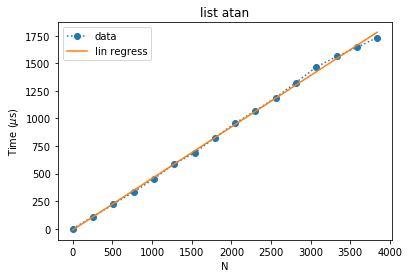

r^2: 0.9986507436211164 
slope: 0.46667013729319134 

Computed 16 loops

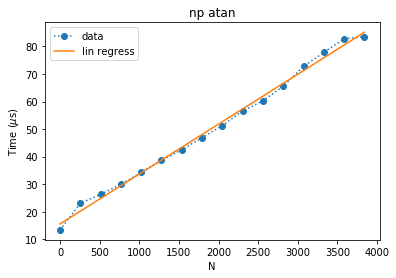

r^2: 0.9948950500420959 
slope: 0.018126328412250772 

Computed 16 loops

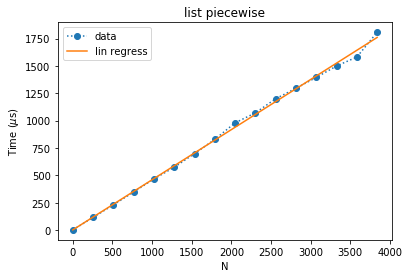

r^2: 0.9978909831227699 
slope: 0.45767104204962583 

Computed 16 loops

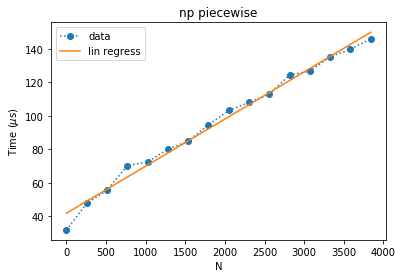

r^2: 0.9879060393466691 
slope: 0.028150814280801354 



In [8]:
for title, args in title_args.items():
    plot(*time3(*args), title)

Computed 16 loops

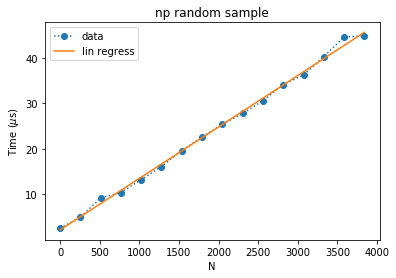

r^2: 0.9972680608113954 
slope: 0.01132076487817093 



(None, None)

In [9]:
plot(*time4(n, nprandom), "np random sample")